In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import accuracy_score
from sklearn.preprocessing   import StandardScaler

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [8]:
df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/jupyter/Pv_Data3.csv")
df;
X = df.drop(['Target','I1','I2','I3','I4','I5','I6','I7','I8'],axis=1).values
X1= df.drop(['Target','Voc','Isc','Vmp','Imp','Pmp','T','G'],axis=1).values
Y=df.loc[:,'Target']
X.shape

(1600, 7)

In [9]:
pca = PCA(n_components=7)
pca.fit(X)
X_pca = pca.transform(X)

In [10]:
trainX, testX, trainY, testY = train_test_split(X_pca, Y, test_size = 0.2,random_state=42)

In [11]:
#sc=StandardScaler()

#scaler = sc.fit(trainX)
#trainX = scaler.transform(trainX)
#testX = scaler.transform(testX)

In [12]:
model = SVC(kernel='linear' ,C=20, gamma='auto')

In [13]:
model.fit(trainX,trainY)

SVC(C=20, gamma='auto', kernel='linear')

In [14]:
ypred = model.predict(trainX) 

In [15]:
c=accuracy_score(trainY,ypred)*100
c

98.28125

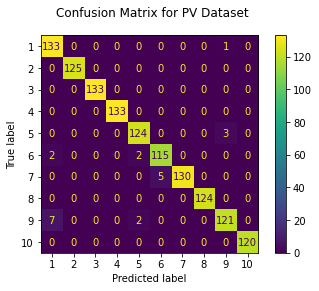

In [16]:
fig = plot_confusion_matrix(model,trainX,trainY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [17]:
ypred1 = model.predict(testX) 

In [18]:
c1=accuracy_score(testY,ypred1)*100
c1

93.75

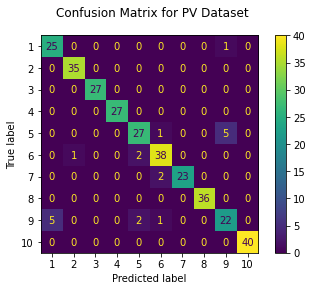

In [19]:
fig = plot_confusion_matrix(model,testX,testY, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV Dataset")
plt.show()

In [20]:
YR=np.concatenate((trainY,testY),axis=0)

In [21]:
YP = np.concatenate((ypred,ypred1), axis=0)

In [22]:
ac2=accuracy_score(YR,YP)*100
ac2

97.375

In [23]:
c2=confusion_matrix(YR,YP)
c2

array([[158,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  0, 160,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 160,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 160,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 151,   1,   0,   0,   8,   0],
       [  2,   1,   0,   0,   4, 153,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   7, 153,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 160,   0,   0],
       [ 12,   0,   0,   0,   4,   1,   0,   0, 143,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 160]], dtype=int64)

C:\Users\ISD\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ISD\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (10).

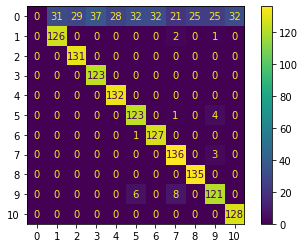

In [26]:
import numpy  as np
import pandas as pd
from sklearn.decomposition   import PCA
from sklearn                 import datasets
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm             import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestClassifier
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import plot_confusion_matrix
from sklearn.neural_network  import MLPClassifier
import matplotlib.pyplot     as plt

#rng = np.random.RandomState(42)
# iris = datasets.load_iris()
# target=iris.target


df = pd.read_csv("C:/Users/ISD/Python_ali/fault_detection/jupyter/Pv_Data3.csv")
df;
X = df.drop(['Target','I1','I2','I3','I4','I5','I6','I7','I8'],axis=1).values
X1= df.drop(['Target','Voc','Isc','Vmp','Imp','Pmp','T','G',],axis=1).values
Y=df.drop(['Voc','Isc','Vmp','Imp','Pmp','T','G','I1','I2','I3','I4','I5','I6','I7','I8',],axis=1).values
X.shape

Y_act=Y

#target
l=[i for i in range(1600)]
random_unlabeled_points=np.random.choice(l,320)
Y[random_unlabeled_points]=-1

#inputs
pca = PCA(n_components=7)
pca.fit(X)
X= pca.transform(X)

trainX, testX,trainY,testY = train_test_split(X ,Y, test_size=0.2, random_state=56)

#model=RandomForestClassifier(n_estimators=120, max_depth=7, criterion='entropy' ,random_state=86)
#model.fit(trainX,trainY)

# random_unlabeled_points = rng.rand(iris.target.shape[0]) < 0.3
# iris.target[random_unlabeled_points] = -1
# target=iris.target

#model= SVC(probability=True, kernel='linear' ,C=20, gamma='auto')

#model=mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,60),max_iter = 300,activation = 'relu',solver = 'adam')

#self_training_model = SelfTrainingClassifier(model, criterion='k_best', k_best=4)

#self_training_model.fit(trainX,trainY)

#pred_train=self_training_model.predict(trainX)
#pred_test=self_training_model.predict(testX)
#pred_all=self_training_model.predict(X)

from sklearn.semi_supervised import LabelSpreading
model = LabelSpreading()
model.fit(trainX,trainY)

pred_all=model.predict(X)
ac_all=accuracy_score(Y_act,pred_all)

fig = plot_confusion_matrix(self_training_model,X,Y_act, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for PV  All Dataset")
plt.show()

